# Project: No show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
%matplotlib inline
from datetime import datetime


This dataset collects information from 100k medical appointments in
Brazil and is focused on the question of whether or not patients show up
for their appointment. A number of characteristics about the patient are
included in each row.
- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

### Questions:

- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
- What factors are least related with patient showing up rate?


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# rename columns into standard English
df.rename(index=str, columns= {'Hipertension':'Hypertension','Handcap':'Handicap'},inplace=True)

In [5]:
# check for duplications
sum(df.duplicated())

0

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 
Get rid of the outliers and unify the dataset

In [7]:
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [8]:
#delete rows with abnormal value: Age = -1, 1 row was deleted
df.drop(df[df['Age']<0].index,inplace=True)

Turn the handicap variable into 1, 0
Set values into 1 for all value above 1 

In [9]:
df.Handicap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [10]:
df.loc[df.Handicap > 1, 'Handicap'] = 1
df.Handicap.unique()

array([0, 1])

In [11]:
df.Handicap.value_counts()

0    108285
1      2241
Name: Handicap, dtype: int64

"waitdays" can be calculated from AppointmentDay and ScheduledDay

In [12]:
df['waitdays'] = pd.to_datetime(df['AppointmentDay'])- pd.to_datetime(df['ScheduledDay'])

In [13]:
df['waitdays'] = df['waitdays'].apply(lambda x: x.days)

In [14]:
df['waitdays'].describe()


count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: waitdays, dtype: float64

In [15]:
df.drop(df[df.waitdays < -1].index, inplace=True)

In [16]:
df.waitdays = df.waitdays + 1

In [17]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1,inplace=True)

Update values in No-show column, No for 0, Yes for 1, and rename it

In [18]:
df['No-show'] = df['No-show'].replace({'Yes':1,'No':0})

In [19]:
df.rename(index=str,columns={'No-show':'No_show'},inplace =True)

In [20]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,waitdays
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


In [21]:
list(df.columns)

['Gender',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS_received',
 'No_show',
 'waitdays']

In [22]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,waitdays
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,37.089386,0.098271,0.197257,0.071869,0.030401,0.020259,0.321043,0.201898,10.184345
std,23.109885,0.297682,0.397929,0.258272,0.171690,0.140884,0.466879,0.401419,15.255153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


<a id='eda'></a>
## Exploratory Data Analysis
### 1 Do gender and age have relation with the attendance

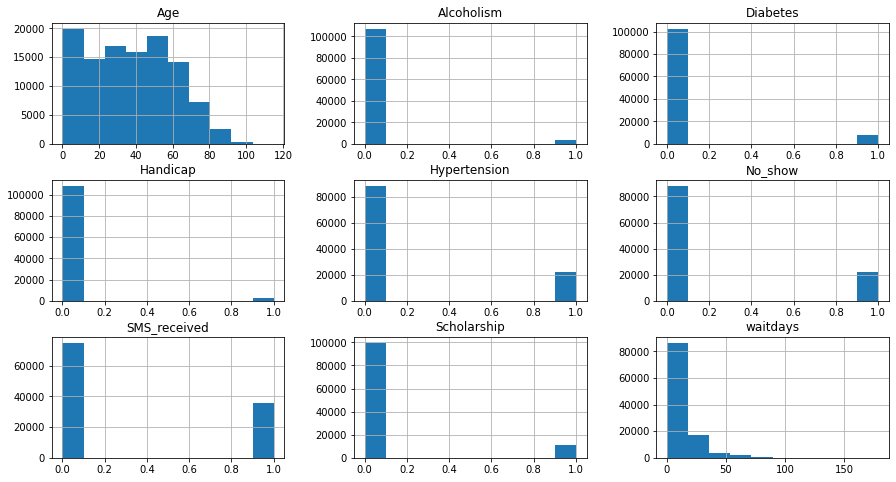

In [23]:
First, we take a glimpse of the data distribution.
df.hist(figsize=(15, 8));

'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show', 'waitdays' are [0,1] data. Most of the values fall into 0. 

Text(0.5, 1.0, 'Patient gender and attendance')

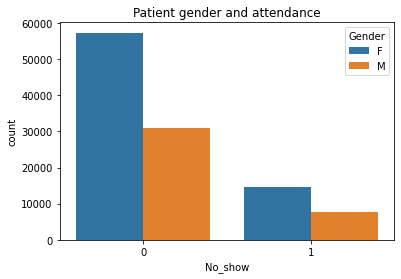

In [24]:
sns.countplot(x=df['No_show'],hue=df['Gender'])
plt.title('Patient gender and attendance')

The number of females show up is greater than the males. May be because we have more data of females but that also show that they vist hospitals more in general.

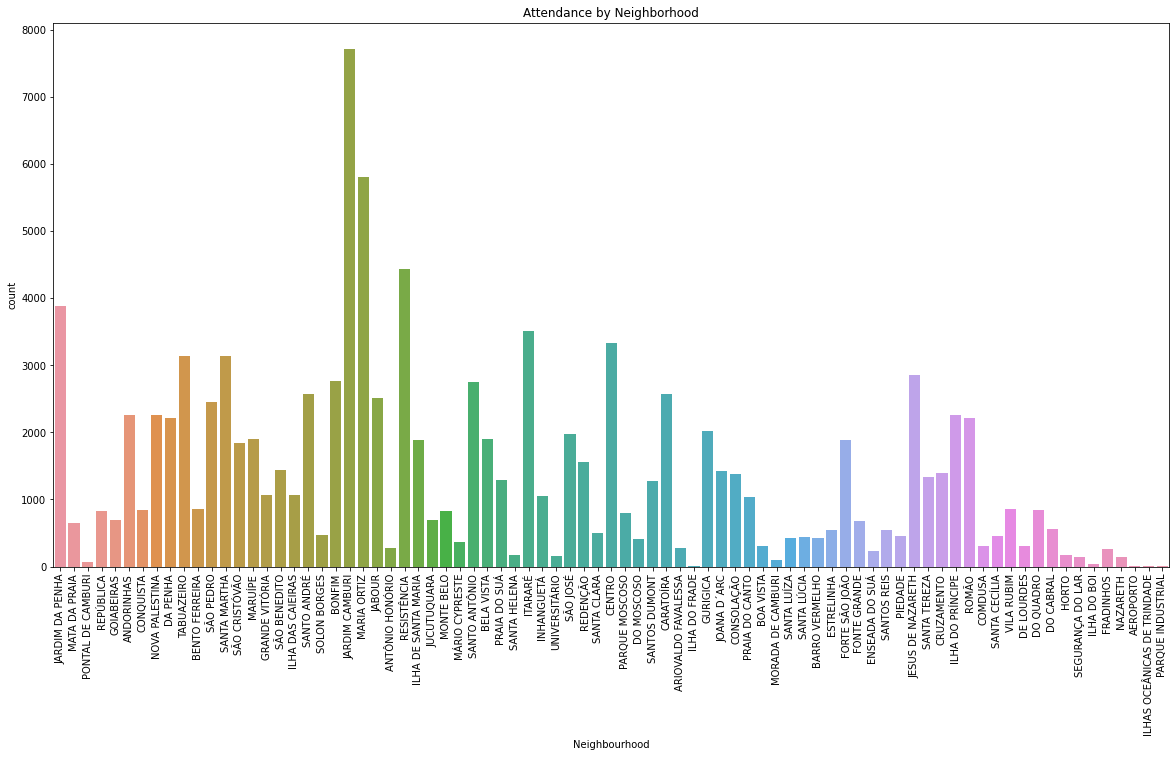

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x=df.Neighbourhood);
plt.title('Attendance by Neighborhood')
plt.xticks(rotation=90);

We see that some neighborhood have more people sign up appointments. They may have more medical resource avaiable or high level of disease.

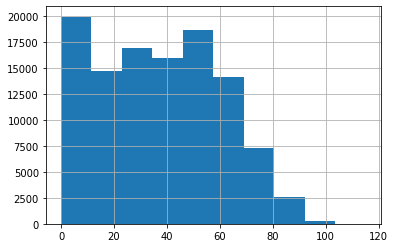

In [26]:
df['Age'].hist(bins=10);

The age distribution is right-skewed (also known as "positively skewed" distribution), most data falls to the right, or positive side, of the graph's peak.
Next, the age is rounded to bins with length 10 to help visualize the data in group.

In [27]:
df['Age'] = [round(a,-1) for a in df['Age']] 
df['Age'].value_counts()

40     15959
60     15628
20     15340
50     14012
30     13026
0      11731
10     11525
70      7365
80      4775
90      1090
100       65
120        5
Name: Age, dtype: int64

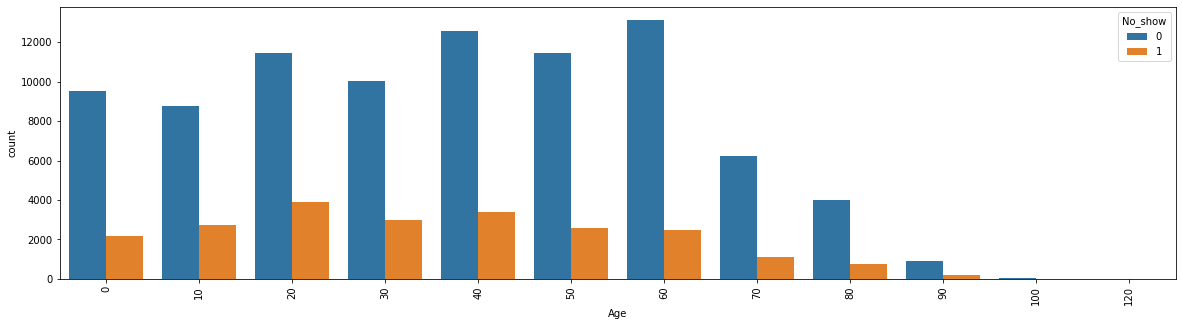

In [28]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['Age'], hue=df['No_show'])
plt.xticks(rotation=90);

The 'age group' no show counterplot shows the right skewed distrition that the majority fo the patients are below 60 years old. 20-30 years group has the highest show up rate.

### Do the disease types affect the patient's show up?

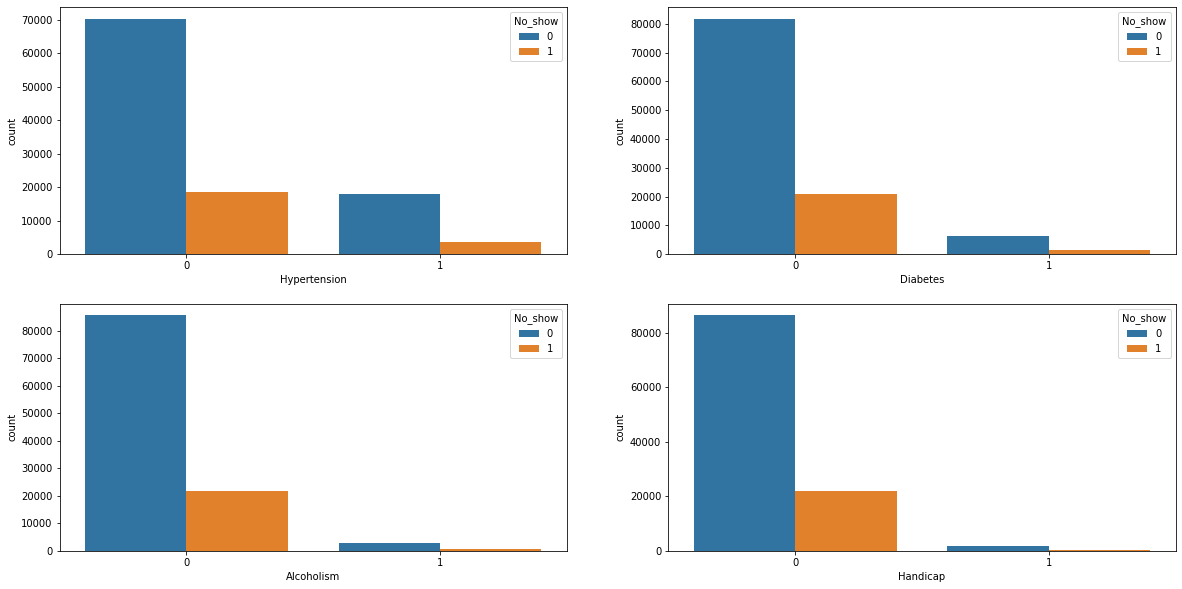

In [29]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
disease_columns = df[['Hypertension','Diabetes','Alcoholism','Handicap']]
plt.figure(figsize=(20,10));
plt.subplot(2,2,1)
sns.countplot(disease_columns['Hypertension'],hue=df['No_show'])
plt.subplot(2,2,2)
sns.countplot(disease_columns['Diabetes'],hue=df['No_show'])
plt.subplot(2,2,3)
sns.countplot(disease_columns['Alcoholism'],hue=df['No_show'])
plt.subplot(2,2,4)
sns.countplot(disease_columns['Handicap'],hue=df['No_show'])

We see that most of them don't have a disease and show up for appointment but we notice that patients of hypertension show up either when they are infected or not which is a mark that hypertension will probably show up more.

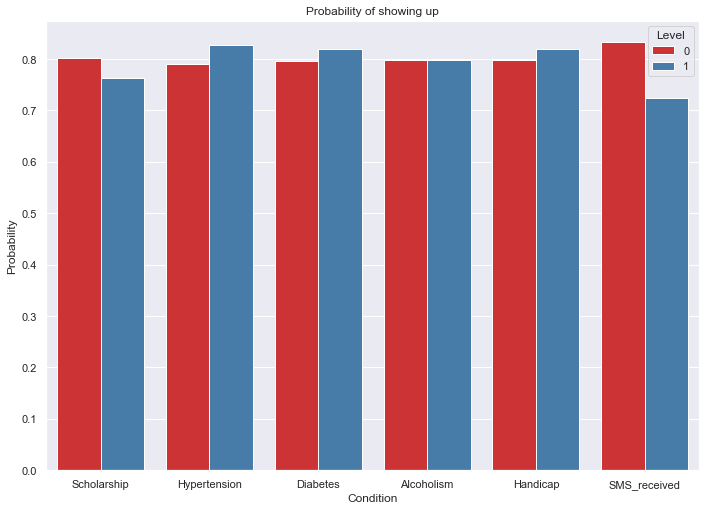

In [36]:
def probStatusCategorical(group_by):
    rows = []
    for item in group_by:
        for level in df[item].unique():
            row = {'Condition': item}
            total = len(df[df[item] == level])
            n = len(df[(df[item] == level) & (df['No_show'] == 0)])
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(data = probStatusCategorical(['Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS_received']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set1')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

With different statis of scholarship and different desease type, it is clear that the probability of showing up is different.
Patients with hypertension and diabetes tend to show up with a higher probability.
Alcoholism does not have strong relation with the rate of showing up.

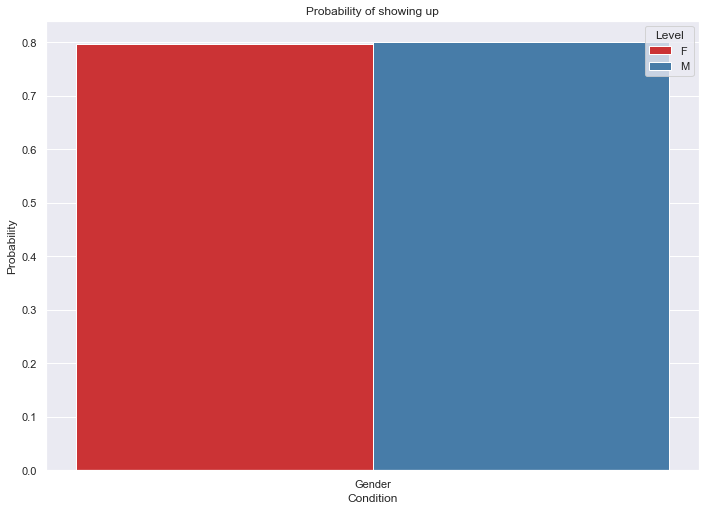

In [37]:
sns.barplot(data = probStatusCategorical(['Gender']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set1')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

Females show up for their appointment slightly more than males. Gender does not play a crucial role here.

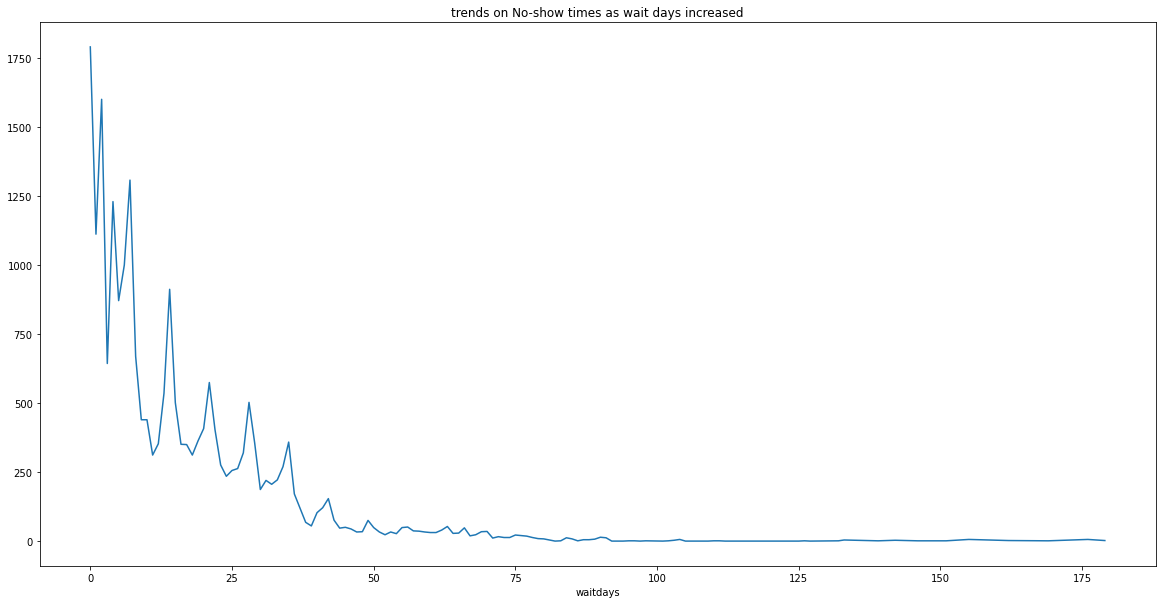

In [32]:
wait_noshow = df.groupby('waitdays').sum()['No_show']
wait_noshow.plot(figsize=(20,10),title='trends on No-show times as wait days increased')

The no show times decreases as the wait days increased. However, the limitation is that the there are overall appointments number decreases over increasing wait days.

<a id='conclusions'></a>
## Conclusions

Now we can see the factors that affect the absence of the patients more clearly. 
1. Females show up for their appointment more than male.
2. Patients with hypertension and diabetes tend to show up with a higher probability.
3. Alcoholism does not have strong relation with the rate of showing up.
4. we need to improve the sms reminder system and try to remind patients of their appointments and increase the show up rate.

**Limitations:**
1. The data could be incomplete. The waiting days in some rows are negative, even one of the age is negative, those wrong data could limit its usability. As we deleted those rows, their impact on the overall analysis need further assessment. 

2. The data are come from surveys, people don’t always provide accurate information. People may not be dishonest so much as self-conscious, but the data is still skewed. For the disease colunms, there is no guarantee that the data is always true. 

3. The scope of the data, especially over time, may fall into the seasonality trap. The no show times decreases as the wait days increased. However, the limitation is that the there are overall appointments number decreases over increasing wait days.

4. Some of the data type (integers, decimal values, or characters, and so forth) is different and I have not set the upper and lower bounds of possible values for age, handicap, and waitdays. 




Reference:
1. https://www.kaggle.com/somrikbanerjee/predicting-show-up-no-show
2. https://www.kaggle.com/samratp/predict-show-noshow-eda-visualization-model
3. https://www.kaggle.com/tsilveira/applying-heatmaps-for-categorical-data-analysis
4. https://www.kaggle.com/kuroski/data-analyst-nanodegree-project-first-attempt
5. https://www.kaggle.com/jfgobin/basic-visualisation-and-prediction
https://www.kaggle.com/tigerli1997/fundamental-data-analysis
6. https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet